In [45]:
import numpy as np
import pandas as pd

# 단순 전략 검증 실습

In [46]:
## 데이터 불러오기###########################################
KOSPI200_index=pd.read_csv('KOSPI200_index.csv').set_index('Date')
KOSPI200_close=pd.read_csv('KOSPI200_close.csv').set_index('Date')
df_port_info=pd.read_csv('codenamelist.csv',encoding='cp949',dtype=str)
df_pf=pd.DataFrame()
del df_port_info['Unnamed: 0']
###########################################################

In [47]:
KOSPI200_close.head()

,005930,000660,005380,068270,051910,012330,055550,017670,005490,051900,...,001520,034120,060980,096760,003920,014830,002960,079430,003300,036580
Date,,,,,,,,,,,,,,,,,,,,,
2018.05.16,49850,87000,150500,268500,342000,237000,48400,221000,363000,1287000,...,2115,25750,51400,8150,674000,57600,334000,23350,166500,12650
2018.05.17,49400,86700,149500,267500,345500,237500,48200,222000,360000,1269000,...,2245,25700,51300,8060,671000,59800,334500,23650,169500,12700
2018.05.18,49500,87900,150000,270000,344000,239000,47750,223000,360500,1268000,...,2250,25550,51700,8190,680000,60200,334500,23850,162500,12950
2018.05.21,50000,89100,149000,270000,338500,241500,47950,222500,361000,1264000,...,2200,25500,51000,8310,687000,60300,335000,23750,164500,12650
2018.05.23,51800,95300,144500,257500,343500,247000,47000,224500,352500,1246000,...,2170,25500,48900,8140,676000,59000,335000,23300,162000,12450


# 종목 선정 로직 적용

In [48]:
# 시작 기간의 주가    #starting day
st=np.array(KOSPI200_close.iloc[0],dtype=int)  

# 6개월(거래일 기준) 후의 주가     # after 6 month  
en=np.array(KOSPI200_close.iloc[0+120-1],dtype=int)

# 기간(6개월) 수익률    #profit ratio of 6month duration
rt=pd.DataFrame([x/y for x,y in zip(en,st)])

In [49]:
# codenamelist Dataframe에 6개월 수익률 
df_port_info['return_period'+str(0)]=rt
# 6개월 수익률 기준으로 Dataframe 정렬
df_sort=df_port_info.sort_values(by=['return_period'+str(0)],ascending=False)
df_sort

,Code,Name,return_period0
112,020150,일진머티리얼즈,1.432099
82,042660,대우조선해양,1.266541
27,036570,엔씨소프트,1.241331
7,017670,SK텔레콤,1.208145
51,005830,DB손해보험,1.200647
38,032640,LG유플러스,1.196850
70,001450,현대해상,1.195973
144,049770,동원F&amp;B;,1.161359
108,012450,한화에어로스페이스,1.142349
81,030000,제일기획,1.138817


# 자산 배분 로직 적용

In [50]:
import time, math

# 10개의 종목만 보유함
top_N=10
port_list=list(df_sort.iloc[:top_N,0])

# portfolio array
pfMat=np.zeros(10)

balance=100000000 # 1억의 초기 자금으로 시작
balanceMat=np.zeros(240) # 포트폴리오의 가치

for j,jj in enumerate(port_list):
    # 각 종목 별 매수 수량을 결정
    pfMat[j]=math.floor((balance/top_N)/int(KOSPI200_close[jj][120]))
    #천만원으로 D-6개월일때의 종가로 살수있는 주의 양 (각 종가에 입각, 각 천만원의 자금으로 해당 주식을 얼마나 살수 있는가)
    
    #밸런스 array에 저장
    balanceMat[120:120+20]+=np.array(KOSPI200_close[jj][120:120+20],dtype=int)*pfMat[j]
    # D-6개월때 산 각 천만원씩 10개의 주식의 20일 동안의 종가 변화의 합.(balanceMat[120]:1억 --한달 후--> balanceMat[140]: 9천만 ==> 20일간은 실이 큰 포트폴리오) )


In [51]:
for i in range(top_N):
    print(i,df_sort.iloc[i,1],'종목  =>  ',int(pfMat[i]),'주 매수')

0 일진머티리얼즈 종목  =>   204 주 매수
1 대우조선해양 종목  =>   298 주 매수
2 엔씨소프트 종목  =>   22 주 매수
3 SK텔레콤 종목  =>   37 주 매수
4 DB손해보험 종목  =>   134 주 매수
5 LG유플러스 종목  =>   657 주 매수
6 현대해상 종목  =>   230 주 매수
7 동원F&amp;B; 종목  =>   35 주 매수
8 한화에어로스페이스 종목  =>   304 주 매수
9 제일기획 종목  =>   446 주 매수


# 매도/매수 시뮬레이션 이행

In [52]:
# 기존 잔고에서 매도/매수 후 잉여 자금이 있을 수 있음
print('  기존 balance : ', balance)

residual=balance-balanceMat[120]
print('    Residual : ', residual)

# 잉여 자금을 반영하여 balance를 업데이트
balance=balanceMat[120+20-1]+residual

print()
print('Update balance : ', balance)

  기존 balance :  100000000
    Residual :  556400.0

Update balance :  98972300.0


# 6개월 전 시점부터 6개월동안(현재까지) 시뮬레이션 진행

In [53]:
# Dataframe이 변경됬으므로, 아래부터 다시 실행
import math
compare_mat=pd.DataFrame(columns=['Ret_1m','Ret_1m_1Y','Ret_3m','Ret_3m_1Y','Ret_6m','Ret_6m_1Y'])

In [54]:
## GLOBAL VARIABLE#########################################
target_n=240                  # 약 1년치 데이터(한달:20거래일로 가정)
initial_balance=100000000     # 초기 잔고 1억
balance=initial_balance
rperiod=20                    # rebalancing period
nperiod=int(120/rperiod)      # rebalncing 횟수
residual=0                    # 잔여 현금
balanceMat=np.zeros(target_n) # 포트폴리오의 가치 시계열
###########################################################

## 데이터 불러오기###########################################
KOSPI200_index=pd.read_csv('KOSPI200_index.csv').set_index('Date')
KOSPI200_close=pd.read_csv('KOSPI200_close.csv').set_index('Date')
df_port_info=pd.read_csv('codenamelist.csv',encoding='cp949',dtype=str)
df_pf=pd.DataFrame()
del df_port_info['Unnamed: 0']
###########################################################

In [55]:
for i in range(nperiod):
    ##### 종목 선정 로직 적용 #################################################
    cur=120+rperiod*i         #한달 주기로   [120, 140, 160, 180, 200, 220] 총 6번
    st=np.array(KOSPI200_close.iloc[cur-120],dtype=int)    
    en=np.array(KOSPI200_close.iloc[cur-1],dtype=int)
    rt=pd.DataFrame([x/y for x,y in zip(en,st)])       # 해당 월 / D-6개월 전 의 종가 = 6개월간의 성장률
    df_port_info['return_period'+str(i)]=rt
    df_sort=df_port_info.sort_values(by=['return_period'+str(i)],ascending=False)     #다음 루프로 갈때마다 수익률에 따른 순위가 바뀐다.
    ########################################################################
    
    ##### 자산 배분 #########################################################
    top_N=10
    port_list=list(df_sort.iloc[:top_N,0])    # 상위 10 까지의 종목 코드
    
    pfMat=np.zeros(top_N)    
    for j,jj in enumerate(port_list):
        pfMat[j]=math.floor((balance/top_N)/int(KOSPI200_close[jj][cur]))    #천만으로 그당시 종가의 가격으로 살수 있는 주식 의 양
        balanceMat[cur:cur+rperiod]+=np.array(KOSPI200_close[jj][cur:cur+rperiod],dtype=int)*pfMat[j]  #매수후 한달간의 소유 주가 변화
    ########################################################################
    
    ###### 메도/매수 이행#####################################################
    residual=balance-balanceMat[cur]
    balance=balanceMat[cur+rperiod-1]+residual
    ########################################################################
    
    ##### 결과 저장 #########################################################
    df_pf['Code_period'+str(i)]=list(df_sort['Code'].iloc[:10])
    df_pf['Name_period'+str(i)]=list(df_sort['Name'].iloc[:10])
    df_pf['return_period'+str(i)]=list(df_sort['return_period'+str(i)].iloc[:10])
    df_pf['volume_period'+str(i)]=pfMat
    ########################################################################


In [56]:
df_pf

,Code_period0,Name_period0,return_period0,volume_period0,Code_period1,Name_period1,return_period1,volume_period1,Code_period2,Name_period2,...,return_period3,volume_period3,Code_period4,Name_period4,return_period4,volume_period4,Code_period5,Name_period5,return_period5,volume_period5
0,020150,일진머티리얼즈,1.432099,204.0,036570,엔씨소프트,1.393557,19.0,012450,한화에어로스페이스,...,1.615925,144.0,004800,효성,1.623126,126.0,009240,한샘,1.940083,100.0
1,042660,대우조선해양,1.266541,298.0,042660,대우조선해양,1.392197,293.0,009540,현대중공업,...,1.549683,261.0,034120,SBS,1.361878,395.0,025540,한국단자,1.671053,151.0
2,036570,엔씨소프트,1.241331,22.0,032640,LG유플러스,1.278571,560.0,017800,현대엘리베이,...,1.418345,301.0,025540,한국단자,1.347678,163.0,064960,S&amp;T;모티브,1.651923,234.0
3,017670,SK텔레콤,1.208145,37.0,028050,삼성엔지니어링,1.274834,523.0,105630,한세실업,...,1.376562,1130.0,005300,롯데칠성,1.292251,5.0,004800,효성,1.625272,134.0
4,005830,DB손해보험,1.200647,134.0,005180,빙그레,1.235200,128.0,000210,대림산업,...,1.375180,2078.0,105630,한세실업,1.287500,389.0,004490,세방전지,1.476969,200.0
5,032640,LG유플러스,1.196850,657.0,009540,현대중공업,1.226244,74.0,042660,대우조선해양,...,1.331873,1624.0,052690,한전기술,1.252381,372.0,105630,한세실업,1.423358,341.0
6,001450,현대해상,1.195973,230.0,000210,대림산업,1.203474,103.0,009420,한올바이오파마,...,1.313725,450.0,004490,세방전지,1.251397,216.0,009830,한화케미칼,1.389728,437.0
7,049770,동원F&amp;B;,1.161359,35.0,017670,SK텔레콤,1.193684,34.0,111770,영원무역,...,1.301181,304.0,009830,한화케미칼,1.234043,424.0,011210,현대위아,1.383356,198.0
8,012450,한화에어로스페이스,1.142349,304.0,008930,한미사이언스,1.161631,129.0,214320,이노션,...,1.294118,1403.0,004370,농심,1.228395,32.0,008560,메리츠종금증권,1.349144,1989.0
9,030000,제일기획,1.138817,446.0,170900,동아에스티,1.149237,95.0,001740,SK네트웍스,...,1.276481,274.0,001740,SK네트웍스,1.210898,1655.0,005850,에스엘,1.338028,417.0


In [57]:
ret_1m=((balanceMat[120+20-1]/initial_balance)-1)*100      #6개월전 을 기준으로 한달뒤 초기 투입자본(1억) 대비 결과
ret_3m=((balanceMat[120+60-1]/initial_balance)-1)*100      #   ''        ''      3달뒤        ''
ret_6m=((balanceMat[120+120-1]/initial_balance)-1)*100
print('기간수익률(1M) => %5.2f'%ret_1m,'%      1Y환산 수익률 ','%5.2f'%float(ret_1m*12),'%')
print('기간수익률(3M) => %5.2f'%ret_3m,'%      1Y환산 수익률 ','%5.2f'%float(ret_3m*4),'%')
print('기간수익률(6M) => %5.2f'%ret_6m,'%      1Y환산 수익률 ','%5.2f'%float(ret_6m*2),'%')
compare_mat.loc['logic1']=['%5.2f'%ret_1m,'%5.2f'%float(ret_1m*12),'%5.2f'%ret_3m,'%5.2f'%float(ret_3m*4),'%5.2f'%ret_6m,'%5.2f'%float(ret_6m*2)]
compare_mat.head()

기간수익률(1M) => -1.58 %      1Y환산 수익률  -19.01 %
기간수익률(3M) => -2.21 %      1Y환산 수익률  -8.85 %
기간수익률(6M) => -6.35 %      1Y환산 수익률  -12.71 %


,Ret_1m,Ret_1m_1Y,Ret_3m,Ret_3m_1Y,Ret_6m,Ret_6m_1Y
logic1,-1.58,-19.01,-2.21,-8.85,-6.35,-12.71


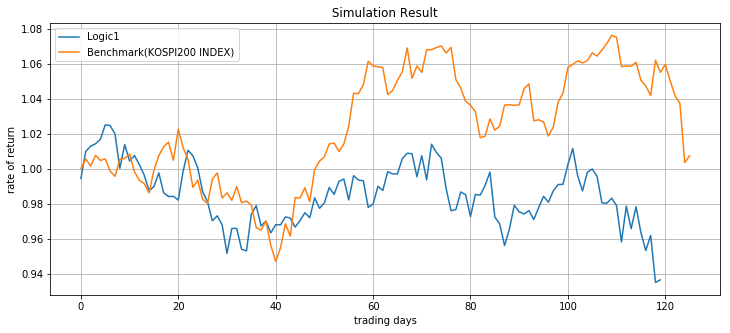

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(balanceMat[120:]/initial_balance)
plt.plot(list(KOSPI200_index['Close'])[120:]/KOSPI200_index['Close'][120])   #특정 종목값이 아닌 그냥 KOSPI 지수의 6개월 간 변화
plt.grid(20)
plt.title(' Simulation Result ')
plt.ylabel('rate of return')
plt.xlabel('trading days')
plt.legend(['Logic1','Benchmark(KOSPI200 INDEX)'])


# logic2
    6개월간 기간수익률로 종목선정, 2개월 마다 리벨런싱

In [59]:
## GLOBAL VARIABLE#########################################
target_n=240                  # 약 1년치 데이터(한달:20거래일로 가정)
initial_balance=100000000     # 초기 잔고 1억
balance=initial_balance
rperiod=40                    # rebalancing period
nperiod=int(120/rperiod)      # rebalncing 횟수
residual=0                    # 잔여 현금
balanceMat2=np.zeros(target_n) # 포트폴리오의 가치 시계열
###########################################################

## 데이터 불러오기###########################################
KOSPI200_index=pd.read_csv('KOSPI200_index.csv').set_index('Date')
KOSPI200_close=pd.read_csv('KOSPI200_close.csv').set_index('Date')
df_port_info=pd.read_csv('codenamelist.csv',encoding='cp949',dtype=str)
df_pf2=pd.DataFrame()
del df_port_info['Unnamed: 0']
###########################################################

In [60]:
for i in range(nperiod):
    ##### 종목 선정 로직 적용 #################################################
    cur=120+rperiod*i         #한달 주기로   [120, 140, 160, 180, 200, 220] 총 6번
    st=np.array(KOSPI200_close.iloc[cur-120],dtype=int)    
    en=np.array(KOSPI200_close.iloc[cur-1],dtype=int)
    rt=pd.DataFrame([x/y for x,y in zip(en,st)])       # 해당 월 / D-6개월 전 의 종가 = 6개월간의 성장률
    df_port_info['return_period'+str(i)]=rt
    df_sort=df_port_info.sort_values(by=['return_period'+str(i)],ascending=False)     #다음 루프로 갈때마다 수익률에 따른 순위가 바뀐다.
    ########################################################################
    
    ##### 자산 배분 #########################################################
    top_N=10
    port_list=list(df_sort.iloc[:top_N,0])    # 상위 10 까지의 종목 코드
    
    pfMat=np.zeros(top_N)    
    for j,jj in enumerate(port_list):
        pfMat[j]=math.floor((balance/top_N)/int(KOSPI200_close[jj][cur]))    #천만으로 그당시 종가의 가격으로 살수 있는 주식 의 양
        balanceMat2[cur:cur+rperiod]+=np.array(KOSPI200_close[jj][cur:cur+rperiod],dtype=int)*pfMat[j]  #매수후 한달간의 실제 소유 주가 변화 결과
    ########################################################################
    
    ###### 메도/매수 이행#####################################################
    residual=balance-balanceMat2[cur]    #매수후 잔여금
    balance=balanceMat2[cur+rperiod-1]+residual    #rebalencing 기간 후 총량 매도 --> 해당 기간동안 적용된 자본금으로 다시 매수loop
    ########################################################################
    
    ##### 결과 저장 #########################################################
    df_pf2['Code_period'+str(i)]=list(df_sort['Code'].iloc[:10])
    df_pf2['Name_period'+str(i)]=list(df_sort['Name'].iloc[:10])
    df_pf2['return_period'+str(i)]=list(df_sort['return_period'+str(i)].iloc[:10])
    df_pf2['volume_period'+str(i)]=pfMat
    ########################################################################


In [61]:
df_pf2

,Code_period0,Name_period0,return_period0,volume_period0,Code_period1,Name_period1,return_period1,volume_period1,Code_period2,Name_period2,return_period2,volume_period2
0,020150,일진머티리얼즈,1.432099,204.0,012450,한화에어로스페이스,1.436009,299.0,004800,효성,1.623126,124.0
1,042660,대우조선해양,1.266541,298.0,009540,현대중공업,1.390319,73.0,034120,SBS,1.361878,388.0
2,036570,엔씨소프트,1.241331,22.0,017800,현대엘리베이,1.340269,85.0,025540,한국단자,1.347678,160.0
3,017670,SK텔레콤,1.208145,37.0,105630,한세실업,1.329231,480.0,005300,롯데칠성,1.292251,5.0
4,005830,DB손해보험,1.200647,134.0,000210,대림산업,1.302826,100.0,105630,한세실업,1.287500,382.0
5,032640,LG유플러스,1.196850,657.0,042660,대우조선해양,1.278656,309.0,052690,한전기술,1.252381,366.0
6,001450,현대해상,1.195973,230.0,009420,한올바이오파마,1.266917,300.0,004490,세방전지,1.251397,212.0
7,049770,동원F&amp;B;,1.161359,35.0,111770,영원무역,1.266453,263.0,009830,한화케미칼,1.234043,417.0
8,012450,한화에어로스페이스,1.142349,304.0,214320,이노션,1.260223,143.0,004370,농심,1.228395,32.0
9,030000,제일기획,1.138817,446.0,001740,SK네트웍스,1.250000,1697.0,001740,SK네트웍스,1.210898,1627.0


In [62]:
ret_1m=((balanceMat2[120+20-1]/initial_balance)-1)*100      #6개월전 을 기준으로 한달뒤 초기 투입자본(1억) 대비 결과
ret_3m=((balanceMat2[120+60-1]/initial_balance)-1)*100      #   ''        ''      3달뒤        ''
ret_6m=((balanceMat2[120+120-1]/initial_balance)-1)*100
print('기간수익률(2M) => %5.2f'%ret_1m,'%      1Y환산 수익률 ','%5.2f'%float(ret_1m*12),'%')
print('기간수익률(4M) => %5.2f'%ret_3m,'%      1Y환산 수익률 ','%5.2f'%float(ret_3m*4),'%')
print('기간수익률(6M) => %5.2f'%ret_6m,'%      1Y환산 수익률 ','%5.2f'%float(ret_6m*2),'%')
compare_mat.loc['logic2']=['%5.2f'%ret_1m,'%5.2f'%float(ret_1m*12),'%5.2f'%ret_3m,'%5.2f'%float(ret_3m*4),'%5.2f'%ret_6m,'%5.2f'%float(ret_6m*2)]
compare_mat.head()

기간수익률(2M) => -1.58 %      1Y환산 수익률  -19.01 %
기간수익률(4M) => -1.07 %      1Y환산 수익률  -4.30 %
기간수익률(6M) => -15.12 %      1Y환산 수익률  -30.25 %


,Ret_1m,Ret_1m_1Y,Ret_3m,Ret_3m_1Y,Ret_6m,Ret_6m_1Y
logic1,-1.58,-19.01,-2.21,-8.85,-6.35,-12.71
logic2,-1.58,-19.01,-1.07,-4.30,-15.12,-30.25


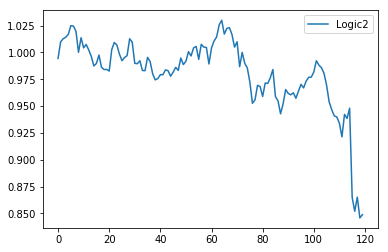

In [63]:
plt.plot(balanceMat2[120:]/initial_balance)
plt.legend(['Logic2'])
plt.show()

# Logic3
    3개월 기간수익률로 종목선정,1개월마다 리벨런싱

In [64]:
## GLOBAL VARIABLE#########################################
target_n=240                 # 약 9개월치 데이터(한달:20거래일로 가정)
initial_balance=100000000     # 초기 잔고 1억
balance=initial_balance
rperiod=20                    # rebalancing period
nperiod=int(120/rperiod)      # rebalncing 횟수
residual=0                    # 잔여 현금
balanceMat3=np.zeros(target_n) # 포트폴리오의 가치 시계열
###########################################################

## 데이터 불러오기###########################################
KOSPI200_index=pd.read_csv('KOSPI200_index.csv').set_index('Date')
KOSPI200_close=pd.read_csv('KOSPI200_close.csv').set_index('Date')
df_port_info=pd.read_csv('codenamelist.csv',encoding='cp949',dtype=str)
df_pf3=pd.DataFrame()
del df_port_info['Unnamed: 0']
###########################################################

In [65]:
for i in range(nperiod):
    ##### 종목 선정 로직 적용 #################################################
    cur=120+rperiod*i         #한달 주기로   [120, 140, 160, 180, 200, 220] 총 6번
    st=np.array(KOSPI200_close.iloc[cur-60],dtype=int)    
    en=np.array(KOSPI200_close.iloc[cur-1],dtype=int)
    rt=pd.DataFrame([x/y for x,y in zip(en,st)])       # 해당 월 / D-6개월 전 의 종가 = 6개월간의 성장률
    df_port_info['return_period'+str(i)]=rt
    df_sort=df_port_info.sort_values(by=['return_period'+str(i)],ascending=False)     #다음 루프로 갈때마다 수익률에 따른 순위가 바뀐다.
    ########################################################################
    
    ##### 자산 배분 #########################################################
    top_N=10
    port_list=list(df_sort.iloc[:top_N,0])    # 상위 10 까지의 종목 코드
    
    pfMat=np.zeros(top_N)    
    for j,jj in enumerate(port_list):
        pfMat[j]=math.floor((balance/top_N)/int(KOSPI200_close[jj][cur]))    #천만으로 그당시 종가의 가격으로 살수 있는 주식 의 양
        balanceMat3[cur:cur+rperiod]+=np.array(KOSPI200_close[jj][cur:cur+rperiod],dtype=int)*pfMat[j]  #매수후 한달간의 실제 소유 주가 변화 결과
    ########################################################################
    
    ###### 메도/매수 이행#####################################################
    residual=balance-balanceMat3[cur]    #매수후 잔여금
    balance=balanceMat3[cur+rperiod-1]+residual    #rebalencing 기간 후 총량 매도 --> 해당 기간동안 적용된 자본금으로 다시 매수loop
    ########################################################################
    
    ##### 결과 저장 #########################################################
    df_pf3['Code_period'+str(i)]=list(df_sort['Code'].iloc[:10])
    df_pf3['Name_period'+str(i)]=list(df_sort['Name'].iloc[:10])
    df_pf3['return_period'+str(i)]=list(df_sort['return_period'+str(i)].iloc[:10])
    df_pf3['volume_period'+str(i)]=pfMat
    ########################################################################


In [66]:
ret_1m=((balanceMat3[120+20-1]/initial_balance)-1)*100      #6개월전 을 기준으로 한달뒤 초기 투입자본(1억) 대비 결과
ret_3m=((balanceMat3[120+60-1]/initial_balance)-1)*100      #   ''        ''      3달뒤        ''
ret_6m=((balanceMat3[120+120-1]/initial_balance)-1)*100
print('기간수익률(2M) => %5.2f'%ret_1m,'%      1Y환산 수익률 ','%5.2f'%float(ret_1m*12),'%')
print('기간수익률(4M) => %5.2f'%ret_3m,'%      1Y환산 수익률 ','%5.2f'%float(ret_3m*4),'%')
print('기간수익률(6M) => %5.2f'%ret_6m,'%      1Y환산 수익률 ','%5.2f'%float(ret_6m*2),'%')
compare_mat.loc['logic3']=['%5.2f'%ret_1m,'%5.2f'%float(ret_1m*12),'%5.2f'%ret_3m,'%5.2f'%float(ret_3m*4),'%5.2f'%ret_6m,'%5.2f'%float(ret_6m*2)]
compare_mat.head()

기간수익률(2M) => -1.98 %      1Y환산 수익률  -23.71 %
기간수익률(4M) => -1.66 %      1Y환산 수익률  -6.62 %
기간수익률(6M) => -1.63 %      1Y환산 수익률  -3.26 %


,Ret_1m,Ret_1m_1Y,Ret_3m,Ret_3m_1Y,Ret_6m,Ret_6m_1Y
logic1,-1.58,-19.01,-2.21,-8.85,-6.35,-12.71
logic2,-1.58,-19.01,-1.07,-4.30,-15.12,-30.25
logic3,-1.98,-23.71,-1.66,-6.62,-1.63,-3.26


# 파라미터를 변경하면서 시뮬레이션

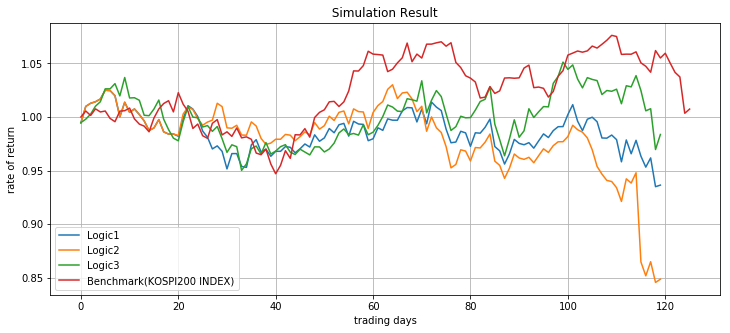

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(balanceMat[120:]/initial_balance)
plt.plot(balanceMat2[120:]/initial_balance)
plt.plot(balanceMat3[120:]/initial_balance)
plt.plot(list(KOSPI200_index['Close'])[120:]/KOSPI200_index['Close'][120])   #특정 종목값이 아닌 그냥 KOSPI 지수의 6개월 간 변화
plt.grid(20)
plt.title(' Simulation Result ')
plt.ylabel('rate of return')
plt.xlabel('trading days')
plt.legend(['Logic1','Logic2','Logic3','Benchmark(KOSPI200 INDEX)'])
plt.show()